In [1]:
from HeaderP import *

In [11]:
pwd

'/Users/yl4331/Desktop/Jdot'

In [13]:
#mh = pd.read_csv('../StarAgeComp/table-1.csv')

In [15]:
#print(len(df))
#df_mh = pd.merge(mh, df, left_on='source_id', right_on='source_id',
#                how='inner')
#print(len(df_mh))

95752
81734


In [16]:
#df_mh.to_csv('GP_gyro_update_MCMC_MH.csv')

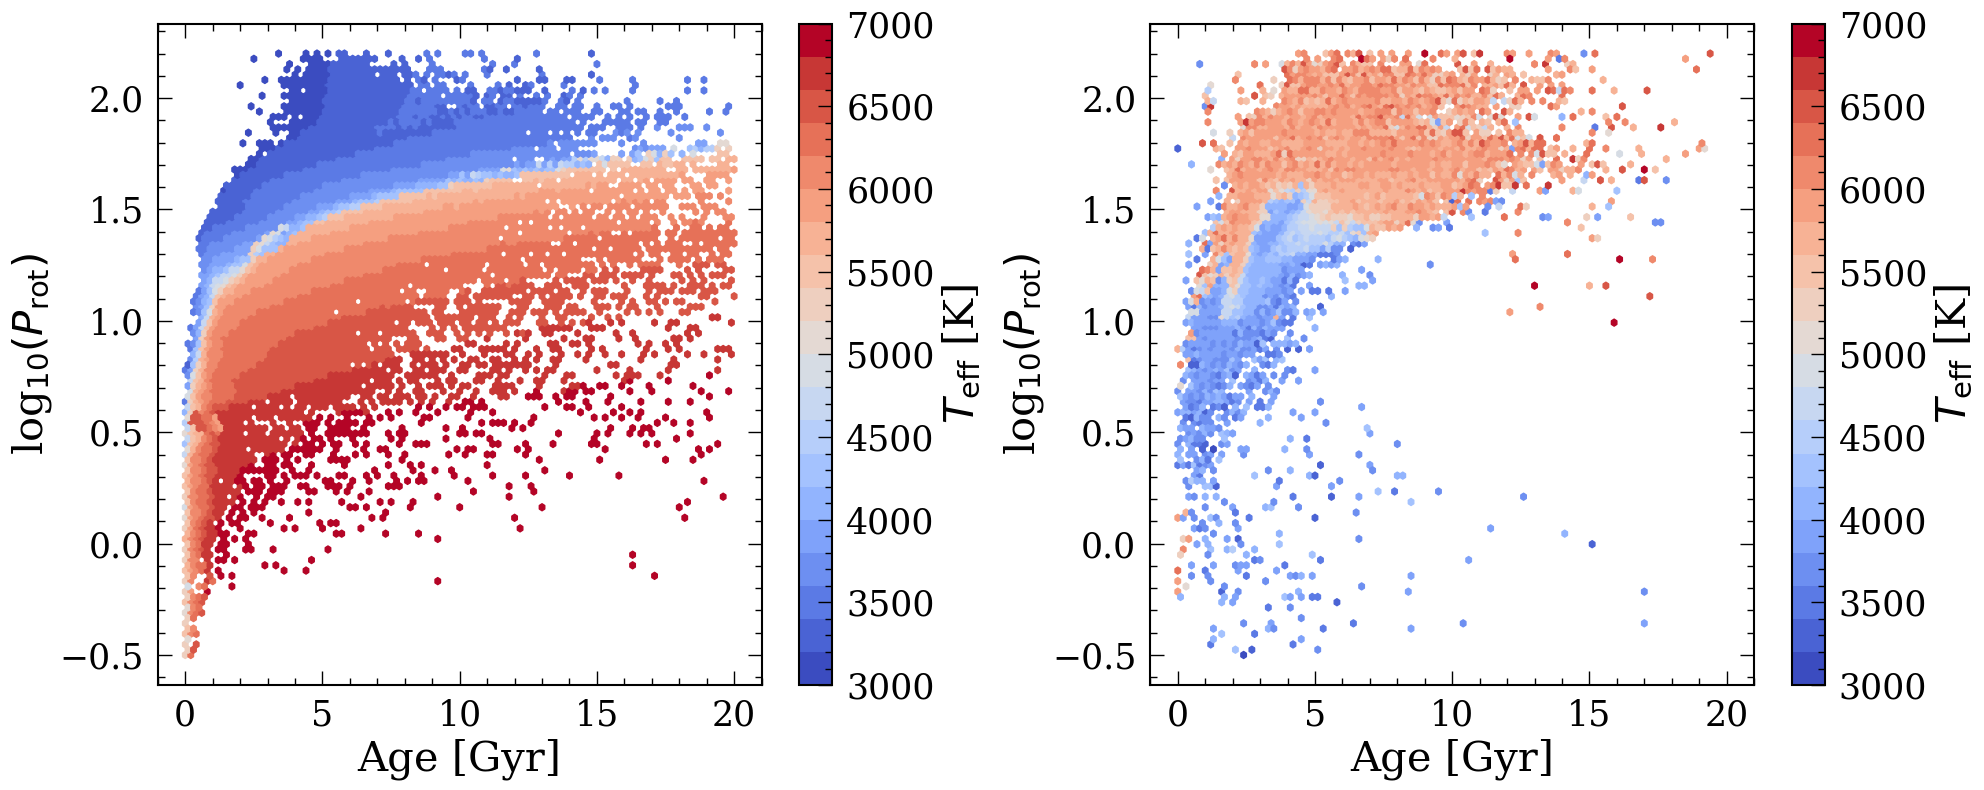

In [2]:
df = pd.read_csv('GP_gyro_update_MCMC.csv')
df_k = pd.read_csv('AllztfAge.csv')
df_k = df_k.loc[df_k['abs_G']>4.2]

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.hexbin(df['gyroage'], df['Prot_log'],C=df['teff_calc'],
          extent=(0,20,-0.5,2.2),vmin=3000,vmax=7000, 
           cmap=plt.get_cmap('coolwarm',20),
          reduce_C_function=np.median)
plt.colorbar(label='$T_{\\rm eff}$ [K]')
plt.xlabel('Age [Gyr]')
plt.ylabel('log$_{10}(P_{\\rm rot})$')

plt.subplot(1,2,2)
plt.hexbin(df_k['kin_age'], df_k['Prot_log'],C=df['teff_calc'],
          extent=(0,20,-0.5,2.2),vmin=3000,vmax=7000, 
           cmap=plt.get_cmap('coolwarm',20),
          reduce_C_function=np.median)
plt.colorbar(label='$T_{\\rm eff}$ [K]')
plt.xlabel('Age [Gyr]')
plt.ylabel('log$_{10}(P_{\\rm rot})$')
plt.tight_layout()

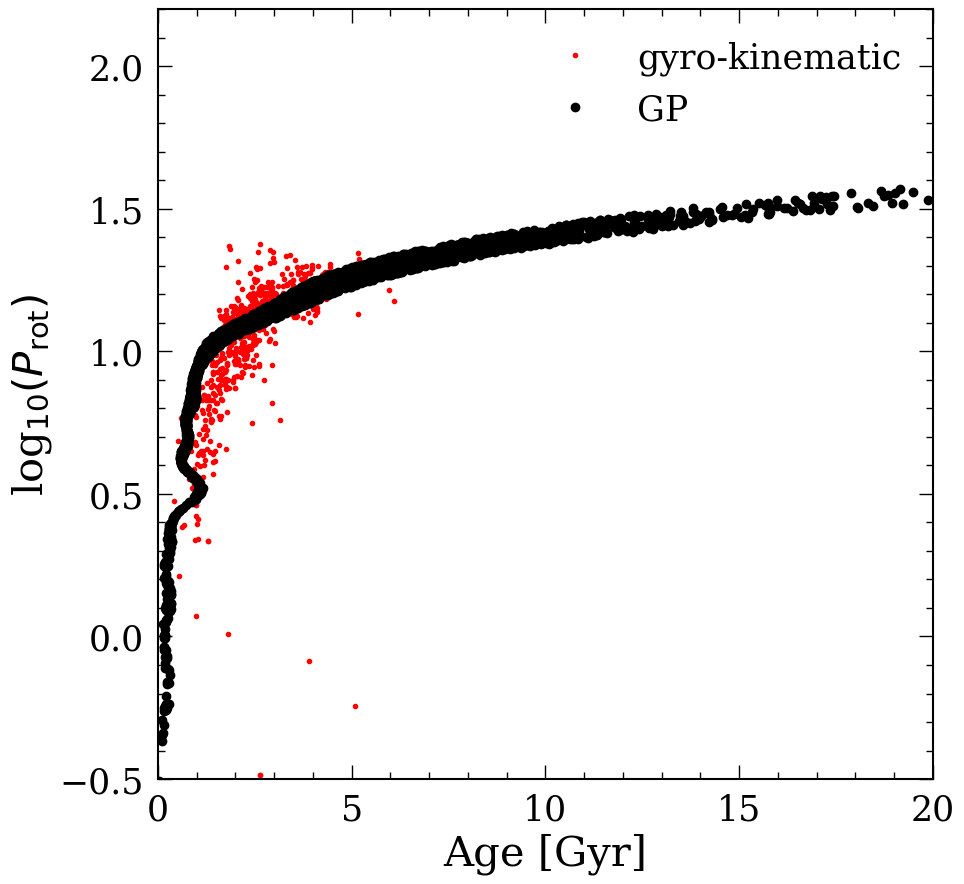

In [3]:
teffbin = [6000, 6100]
df_plt = df.loc[(df['teff_calc']>teffbin[0])&(df['teff_calc']<teffbin[1])]
df_k_plt = df_k.loc[(df_k['teff_calc']>teffbin[0])&(df_k['teff_calc']<teffbin[1])]
plt.plot(df_k_plt['kin_age'], df_k_plt['Prot_log'], 'r.', label='gyro-kinematic')
plt.plot(df_plt['gyroage'], df_plt['Prot_log'], 'ko', label='GP')
plt.xlabel('Age [Gyr]')
plt.ylabel('log$_{10}(P_{\\rm rot})$')
plt.ylim([-0.5,2.2])
plt.xlim([0,20])
plt.legend()

# calculate $dJ/dt$ vs $\omega$

In [4]:
def calJdot(age, prot, agebin=np.linspace(1,15,50)):
    w = prot
    
    jdots = np.zeros(len(agebin)-1)
    ws = np.zeros(len(agebin)-1)
    
    dt = np.diff(agebin)[0]
    for i in range(len(agebin)-1):
        m = ((age>agebin[i])&(age<agebin[i+1]))
        if sum(m)<10:
            jdots[i] = np.nan
        else:
            jdots[i] = np.percentile(age[m],99)-np.percentile(age[m],1)
            jdots[i] = jdots[i]/dt
        ws[i] = np.mean(w[m])
        
    return jdots, ws, agebin[:1]/2+agebin[1:]/2

Text(0, 0.5, 'Ro')

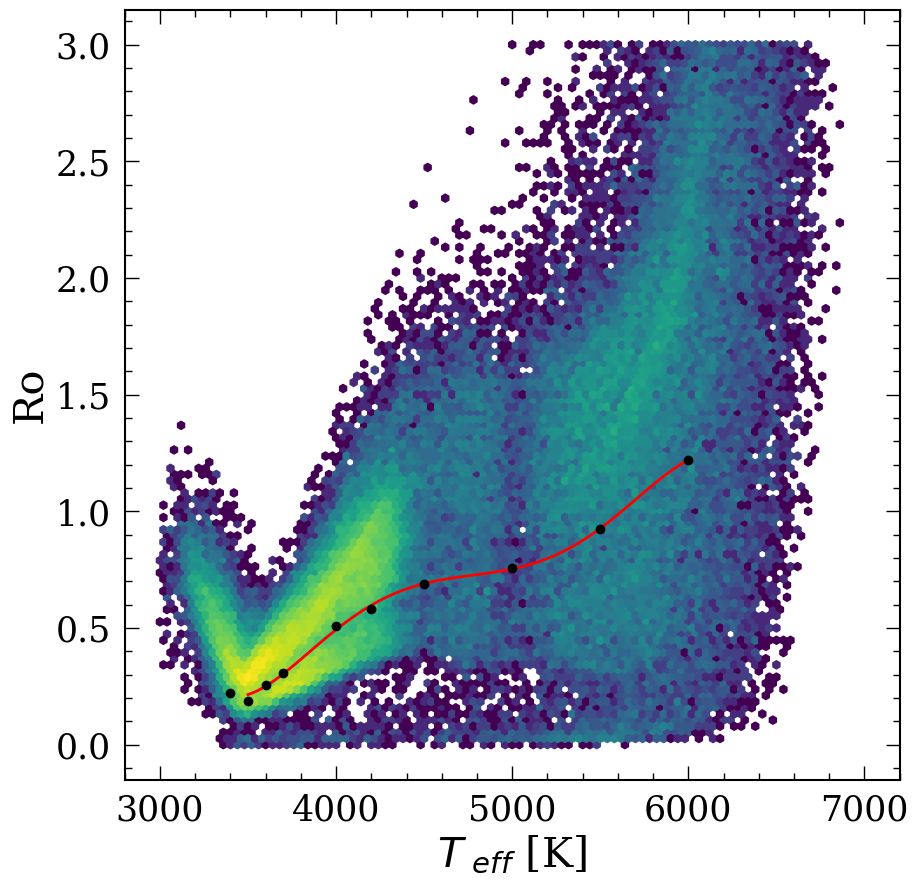

In [5]:
df['τc'] = tauc(df['teff_calc'])
df['Ro'] = df['Prot']/df['τc']
plt.hexbin(df['teff_calc'], df['Ro'], 
          bins='log', extent=(3000, 7000, 0, 3))
m = (df['teff_calc']>0)
p = fitpoints(df['teff_calc'][m], df['Prot'][m], 3)

tp = [3400, 4000, 5000, 4500, 3500,3600,3700,4200, 5500, 6000]
wp = [0.18, 0.3, 0.4, 0.38, 0.21,0.22,0.25,0.35, 0.4, 0.6]
p = fitpoints(tp, 2*np.pi/np.array(wp)/tauc(tp), 5)

teffs = np.linspace(3500, 6000, 100)
plt.plot(teffs, p(teffs), 'r-')
plt.plot(tp, 2*np.pi/np.array(wp)/tauc(tp), 'ko')
plt.xlabel('$T_{\\ eff}$ [K]')
plt.ylabel('Ro')

In [9]:
sum(df['kepid']!=0)

37589

95752


  0%|                                                                                                                                                | 0/10 [00:00<?, ?it/s]/opt/homebrew/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
 40%|██████████████████████████████████████████████████████▍                                                                                 | 4/10 [00:01<00:01, 

"plt.figure()\nfor i in trange(len(teffbins)):\n    m = ((df_k['teff_calc']>teffbins[i]-teffbins_width)&(df_k['teff_calc']<teffbins[i]+teffbins_width))\n    jdot, ws, tao = calJdot(df_k[m]['kin_age'].values, df_k[m]['Prot'].values)\n    jdot_sm = gaussian_filter(jdot, 5)\n    plt.plot(ws, jdot, '.', color=colors[i])\n    plt.plot(ws, jdot_sm, '-', color=colors[i], label='$T_{\\rm eff}$ = %d K'%(teffbins[i]))\nplt.xlabel('ω [1/day]')\nplt.ylabel('$dω/dt$')\nplt.ylim([0.3,1])\nplt.xlim([0.1, 1])\nplt.xscale('log')\nplt.legend(bbox_to_anchor=(1.05, 0.5, 0.5, 0.5))\n#jdot, ws, tao = calJdot(df_k['kin_age'].values, df_k['Prot'].values)\n#plt.plot(ws, jdot, 'ro-')"

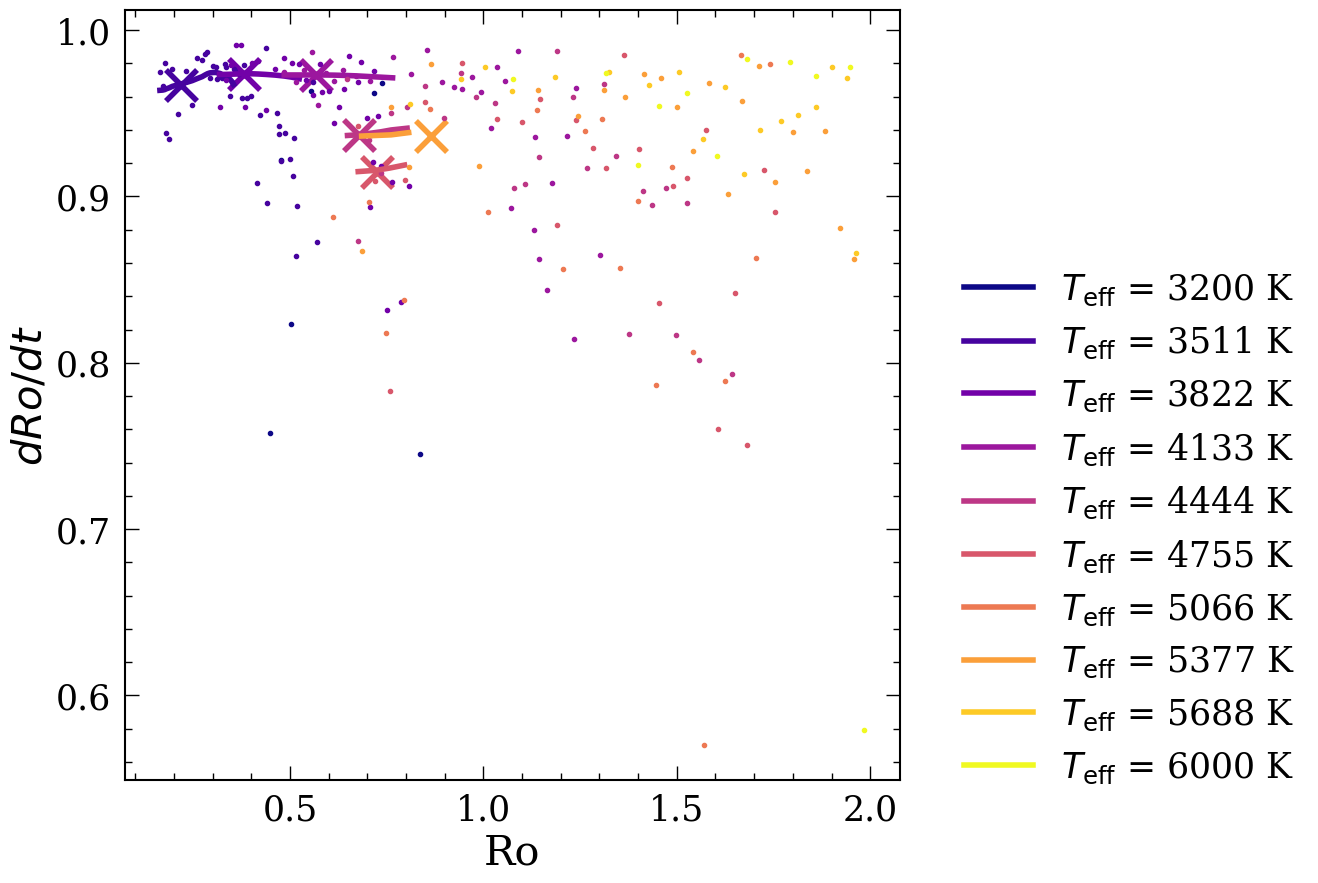

In [10]:
df['τc'] = tauc(df['teff_calc'])
df['Ro'] = df['Prot']/df['τc']
#print(len(df))
df = df.loc[df['Ro']<2].reset_index(drop=True)
df = df.loc[df['gyroage']<20].reset_index(drop=True)
#df.to_csv('GP_gyro_update_MCMC_RoCut.csv')
print(len(df))


teffbins = np.linspace(3200, 6000, 10)
#teffbins = [3500, 4500, 6000]
teffbins_width = 50
colors = getcolor(teffbins)

plt.figure()
for i in trange(len(teffbins)):
    m = ((df['teff_calc']>teffbins[i]-teffbins_width)&(df['teff_calc']<teffbins[i]+teffbins_width))
    jdot, ws, tao = calJdot(df[m]['gyroage'].values, df[m]['Ro'].values)
    jdot_sm = gaussian_filter(jdot, 5)
    plt.plot(ws, jdot, '.', color=colors[i])
    plt.plot(ws, jdot_sm, '-', color=colors[i], linewidth=4,
             label='$T_{\\rm eff}$ = %d K'%(teffbins[i]))
    #print(jdot_sm)
    jdot_crit = jdot_sm[np.argmin(abs(p(teffbins[i])-ws))]
    if np.isnan(jdot_crit):
        jdot_crit = jdot_sm[jdot_sm==jdot_sm]
        if len(jdot_crit)==0:
            continue
        else:
            jdot_crit = jdot_crit[0] 
    plt.scatter(p(teffbins[i]), jdot_crit, c=colors[i],
                marker='x',
            s=500, linewidth=4)
    #print(w_crit)
    
plt.xlabel('Ro')
plt.ylabel('$dRo/dt$')
#plt.ylim([0.3,1])
#plt.xlim([0.08, 1])
#plt.xscale('log')
plt.legend(bbox_to_anchor=(1.05, 0.2, 0.5, 0.5))
#plt.xticks([0.1,0.2,0.3,0.4,0.6,1], rotation=45)

#jdot, ws, tao = calJdot(df_k['kin_age'].values, df_k['Prot'].values)
#plt.plot(ws, jdot, 'ro-')


"""plt.figure()
for i in trange(len(teffbins)):
    m = ((df_k['teff_calc']>teffbins[i]-teffbins_width)&(df_k['teff_calc']<teffbins[i]+teffbins_width))
    jdot, ws, tao = calJdot(df_k[m]['kin_age'].values, df_k[m]['Prot'].values)
    jdot_sm = gaussian_filter(jdot, 5)
    plt.plot(ws, jdot, '.', color=colors[i])
    plt.plot(ws, jdot_sm, '-', color=colors[i], label='$T_{\\rm eff}$ = %d K'%(teffbins[i]))
plt.xlabel('ω [1/day]')
plt.ylabel('$dω/dt$')
plt.ylim([0.3,1])
plt.xlim([0.1, 1])
plt.xscale('log')
plt.legend(bbox_to_anchor=(1.05, 0.5, 0.5, 0.5))
#jdot, ws, tao = calJdot(df_k['kin_age'].values, df_k['Prot'].values)
#plt.plot(ws, jdot, 'ro-')"""

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  5.67it/s]


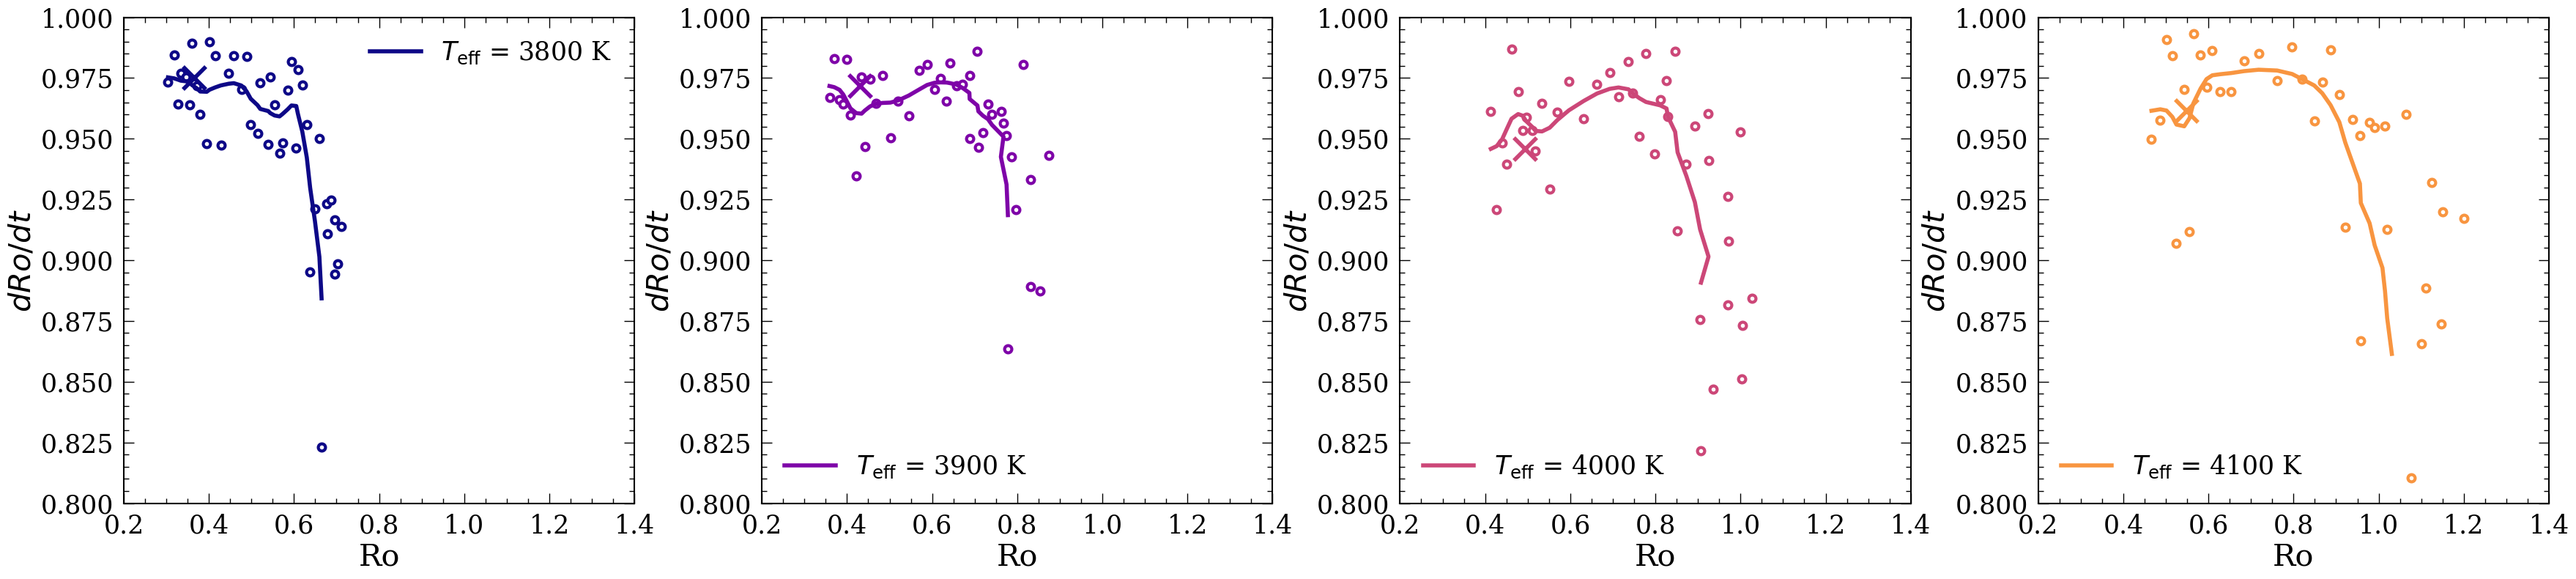

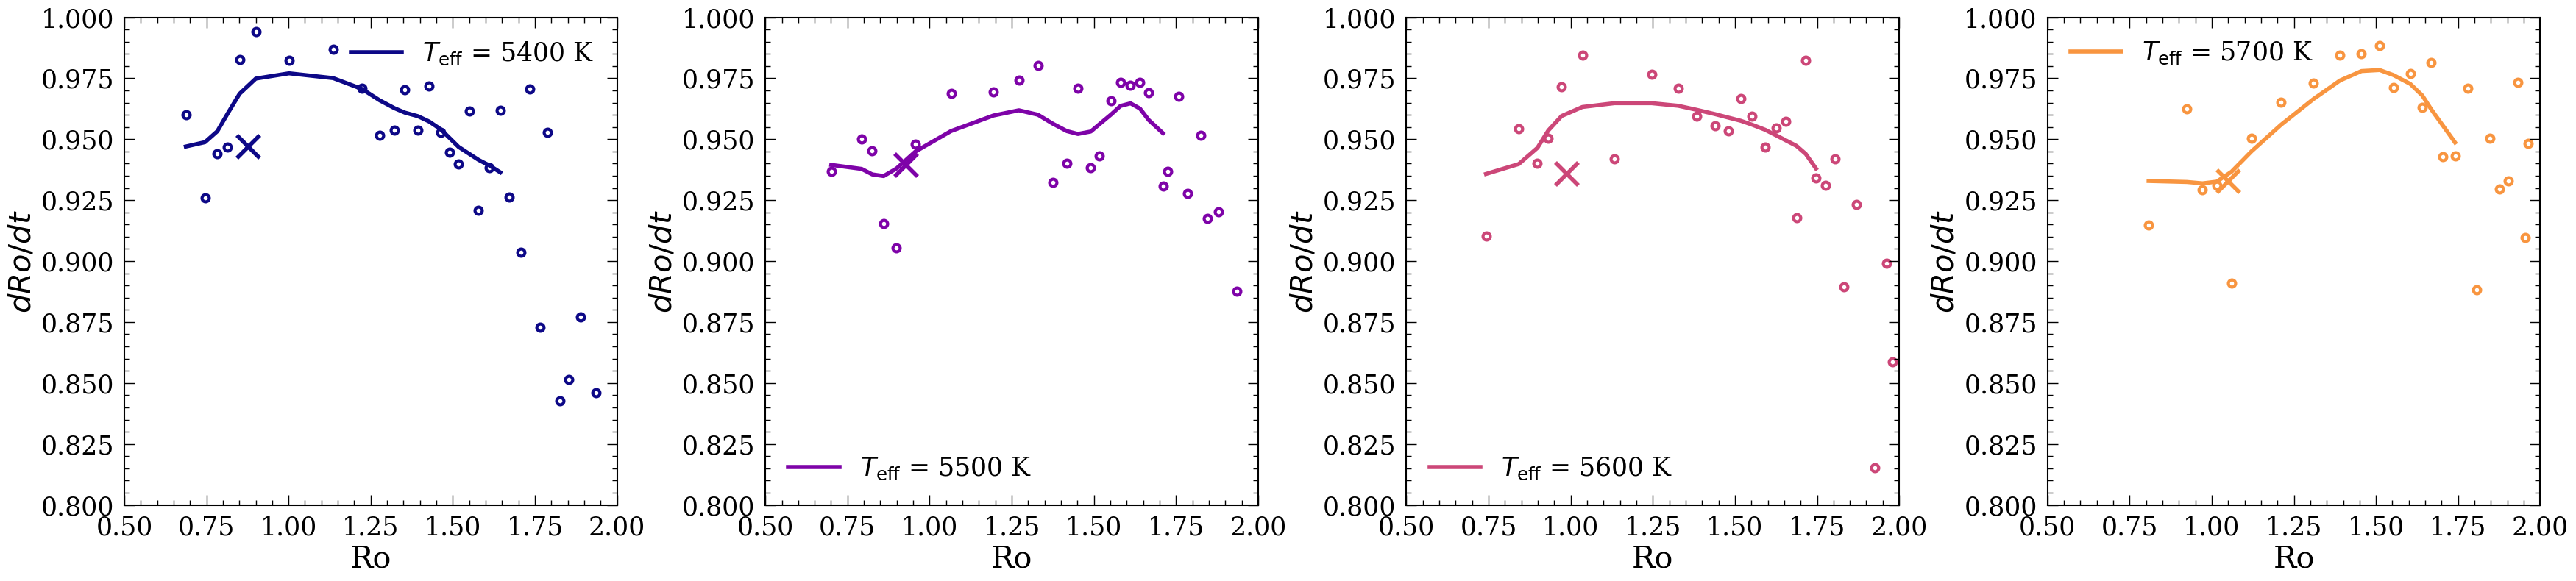

In [98]:
#df_k['gyroage'] = df_k['kin_age']
#df = df_k

teffbins = [3800, 3900, 4000, 4100]
#teffbins = [3900, 4000]
teffbins_width = 50
colors = getcolor(range(len(teffbins)+1))
plt.figure(figsize=(35,8))
for i in trange(len(teffbins)):
    plt.subplot(1,4,i+1)
    m = ((df['teff_calc']>teffbins[i]-teffbins_width)&(df['teff_calc']<teffbins[i]+teffbins_width))
    jdot, ws, tao = calJdot(df[m]['gyroage'].values, df[m]['Ro'].values,agebin=np.linspace(1,15,int(14/0.2)))
    jdot_sm = gaussian_filter(jdot, 2)
    plt.scatter(ws, jdot, c='w', s=50, edgecolor=colors[i],
               linewidth=3)
    plt.plot(ws, jdot_sm, '-', color=colors[i], linewidth=4,
             label='$T_{\\rm eff}$ = %d K'%(teffbins[i]))
    #print(jdot_sm)
    jdot_crit = jdot_sm[np.argmin(abs(p(teffbins[i])-ws))]
    if np.isnan(jdot_crit):
        jdot_crit = jdot_sm[jdot_sm==jdot_sm]
        if len(jdot_crit)==0:
            continue
        else:
            jdot_crit = jdot_crit[0] 
    plt.scatter(p(teffbins[i]), jdot_crit, c=colors[i],
                marker='x',
            s=500, linewidth=4)
    #print(w_crit)
    
    plt.xlabel('Ro')
    plt.ylabel('$dRo/dt$')
    plt.ylim([0.8,1])
    plt.xlim([0.2, 1.4])
    #plt.xscale('log')
    plt.legend()
    #plt.xticks([0.1,0.2,0.3,0.4,0.6,1], rotation=45)
plt.tight_layout()


"""teffbins = [4300, 4500, 4700, 4900]
#teffbins = [3900, 4000]
teffbins_width = 50
colors = getcolor(range(len(teffbins)+1))
plt.figure(figsize=(35,8))
for i in trange(len(teffbins)):
    plt.subplot(1,4,i+1)
    m = ((df['teff_calc']>teffbins[i]-teffbins_width)&(df['teff_calc']<teffbins[i]+teffbins_width))
    jdot, ws, tao = calJdot(df[m]['gyroage'].values, df[m]['Prot'].values,agebin=np.linspace(1,15,int(14/0.2)))
    jdot_sm = gaussian_filter(jdot, 5)
    plt.scatter(ws, jdot, c='w', s=50, edgecolor=colors[i],
               linewidth=3)
    plt.plot(ws, jdot_sm, '-', color=colors[i], linewidth=4,
             label='$T_{\\rm eff}$ = %d K'%(teffbins[i]))
    #print(jdot_sm)
    jdot_crit = jdot_sm[np.argmin(abs(p(teffbins[i])-ws))]
    if np.isnan(jdot_crit):
        jdot_crit = jdot_sm[jdot_sm==jdot_sm]
        if len(jdot_crit)==0:
            continue
        else:
            jdot_crit = jdot_crit[0] 
    plt.scatter(p(teffbins[i]), jdot_crit, c=colors[i],
                marker='x',
            s=500, linewidth=4)
    #print(w_crit)
    
    plt.xlabel('ω [1/day]')
    plt.ylabel('$dω/dt$')
    plt.ylim([0.8,1])
    plt.xlim([0.1, 1])
    plt.xscale('log')
    plt.legend()
    #plt.xticks([0.1,0.2,0.3,0.4,0.6,1], rotation=45)
plt.tight_layout()"""



teffbins = [5400, 5500, 5600, 5700]
#teffbins = [3900, 4000]
teffbins_width = 50
colors = getcolor(range(len(teffbins)+1))
plt.figure(figsize=(35,8))
for i in trange(len(teffbins)):
    plt.subplot(1,4,i+1)
    m = ((df['teff_calc']>teffbins[i]-teffbins_width)&(df['teff_calc']<teffbins[i]+teffbins_width))
    jdot, ws, tao = calJdot(df[m]['gyroage'].values, df[m]['Ro'].values,agebin=np.linspace(1,15,int(14/0.2)))
    jdot_sm = gaussian_filter(jdot, 2)
    plt.scatter(ws, jdot, c='w', s=50, edgecolor=colors[i],
               linewidth=3)
    plt.plot(ws, jdot_sm, '-', color=colors[i], linewidth=4,
             label='$T_{\\rm eff}$ = %d K'%(teffbins[i]))
    #print(jdot_sm)
    jdot_crit = jdot_sm[np.argmin(abs(p(teffbins[i])-ws))]
    if np.isnan(jdot_crit):
        jdot_crit = jdot_sm[jdot_sm==jdot_sm]
        if len(jdot_crit)==0:
            continue
        else:
            jdot_crit = jdot_crit[0] 
    plt.scatter(p(teffbins[i]), jdot_crit, c=colors[i],
                marker='x',
            s=500, linewidth=4)
    #print(w_crit)
    
    plt.xlabel('Ro')
    plt.ylabel('$dRo/dt$')
    plt.ylim([0.8,1])
    plt.xlim([0.5, 2])
    #plt.xscale('log')
    plt.legend()
    #plt.xticks([0.1,0.2,0.3,0.4,0.6,1], rotation=45)
plt.tight_layout()

In [92]:
test = pd.read_pickle('../NIHAORbirth/g2.79e12_z_0_decomp.pkl')

In [99]:
len(test)

6672510

In [39]:
test['R'] = np.sqrt(test['x']**2+test['y']**2)
test.loc[(test['Rbir']<3)&(test['R']>5)][['tform','iord','Rbir','R']]

,tform,iord,Rbir,R
22,0.381287,39422960,2.264432,5.666047
51,0.417476,39423275,2.706987,7.027146
54,0.417476,39423278,0.544685,7.254215
58,0.417476,39423282,0.506327,5.345861
98,0.462492,39423781,2.584852,15.602378
...,...,...,...,...
6639534,14.056332,47954014,2.899334,5.277070
6639602,14.056332,47954095,2.538716,5.236842
6639740,14.056332,47954273,2.852567,5.136040
6640075,14.057215,47954678,2.694179,5.223133


In [ ]:
39422960, 39423063

In [104]:
test[test['iord']==39422960][['tform','Rbir','R']]

,tform,Rbir,R
22,0.381287,2.264432,5.666047


In [105]:
test[test['iord']==39423063][['tform','Rbir','R']]

,tform,Rbir,R
26,0.392762,10.376364,3.173887
